# Three Body
Created by: Wesley Terrill
Revised on: (04/25/2019)


The potential of the n-body system changes with interactions between each mass. The potential between two of the bodies is:
$U_{ij}(r) = -G \frac{m_i m_j}{r_{ij}}$<br/>

In cartesian coordinates, this becomes:<br/>

$
U_{ij} = -G \frac{m_i m_j}{\sqrt{(x_i-x_j)^2 + (y_i-y_j)^2}}
$<br/>

The three body system has three potentials that are summed together.<br/>

$
U_{12} = -G \frac{m_1 m_2}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}}
\\
U_{13} = -G \frac{m_1 m_3}{\sqrt{(x_1-x_3)^2 + (y_1-y_3)^2}}
\\
U_{23} = -G \frac{m_2 m_3}{\sqrt{(x_2-x_3)^2 + (y_2-y_3)^2}}
$

From the file orbits, the lagrange_finder class may be used.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import linalg as LA 

from scipy.integrate import odeint

from mpmath import *

#import functions from sympy
import sympy as sym
from sympy import *
#from sympy.mpmath import *

#from sympy.functions.elementary.trigonometric import sin, cos
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
from sympy.printing.mathml import print_mathml
from sympy.abc import t
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function

from IPython.display import display, Math #for printing latex string

from scipy.integrate import solve_ivp

from matplotlib import animation, rc
from IPython.display import HTML, Image
from matplotlib import animation, rc



In [3]:
class Lagrange_finder():
    """
    Lagrange_finder class implements the parameters to solve 
    Lagrangian for motion of system of most systems
    
    Parameters
    ----------
    q(t) : dynamic symbol array
        position of mass as a function of time in terms of angle
        to be solved for
        will be defined outside class
        
    q_dot(t) : dynamic symbol array
        angular velocity of mass as a function of time
        defined outside class
        
    p(t) : non-dynamic array
        same as q
        subs in for dynamic terms
        
    p_dot(t) : non-dynamic array
        same as q_dot
        subs in for dynamic terms
        
    p_ddot(t) : non-dynamic array
        The acceleration components of q
        subs in for dyamic terms
    
    Methods
    -------
    Lagrangian
        creates lagrangian given kinetic energy and potential energy
        in terms of q(t) and q_dot(t)
        Returns the Lagrangian
        
    Lagrange
        takes Lagrangian and uses to solve the Lagrange equations
        Returns two lists of each half of differential equations
    """
    
    def __init__(self, q, q_dot, p, p_dot, p_ddot):
        self.q = q
        self.q_dot = q_dot
        self.p = p
        self.p_dot = p_dot
        self.p_ddot = p_ddot
        
    def Lagrangian(self, U, T):
        """
        Forms the Lagrangian of the pendulum system given Potential 
        and Kinetic energy of system
        Solves Lagranges equations symbolically
        Returns the Lagrange
        """
        
        self.Lagrangian = simplify(T - U)
        
        return self.Lagrangian
    
    def Lagrange(self):
        """
        takes Lagrangian and uses to solve the Lagrange equations
        Returns two lists of each half of differential equations
        """
        # intialize list of ODE for each term
        self.ODE = []
        
        # iterates for each angle variable
        for i in range(0, len(self.q)):
            #Derivative with respect to q
            dL_dq = diff(self.Lagrangian, self.q[i])
        
            #Derivative with respect to q_dot
            dL_dq_dot = simplify(diff(self.Lagrangian, self.q_dot[i]))
        
            #Time derivative
            dL_dq_dot_dt = diff(dL_dq_dot, t)
            
            #assemble as function
            lagrange = simplify(Eq(dL_dq,dL_dq_dot_dt))
        
            #loop substitutes variables earlier for ease of reading using vector U
            for j in range(len(self.q)):
                lagrange = lagrange.subs([(diff(self.q_dot[j],t), self.p_ddot[j]),
                                          (self.q_dot[j], self.p_dot[j]), 
                                          (self.q[j],p[j])])
            
            diffeq = solve(lagrange, self.p_ddot[i])
            #self.ODE.append([diff(diff(self.q[i],t),t), diffeq])
            self.ODE.append(diffeq)
    
        return self.ODE


The symbolic elements from orbits can also be reused with additional requirements of the third body added in

In [4]:
### define dynamic symbols for cartesian coordinates ###
# x-coordinate
xt_1, xt_2, xt_3 = dynamicsymbols('x_1, x_2, x_3')

# y-coordinate
yt_1, yt_2, yt_3 = dynamicsymbols('y_1, y_2, y_3')

#create derivative of the x-coordinate
xt_1_dot = diff(xt_1, t)
xt_2_dot = diff(xt_2, t)
xt_3_dot = diff(xt_3, t)

#create derivative of the y-coordinate
yt_1_dot = diff(yt_1, t)
yt_2_dot = diff(yt_2, t)
yt_3_dot = diff(yt_3, t)

### redefine dynamic symbols for substitution later to remove dynamics ###
# position
x_1, x_2, x_3 = symbols('x_1, x_2, x_3')
y_1, y_2, y_3 = symbols('y_1, y_2, y_3')

# velocity
x_1_dot, x_2_dot, x_3_dot = symbols(r'\dot{x_1}, \dot{x_2}, \dot{x_3}')
y_1_dot, y_2_dot, y_3_dot = symbols(r'\dot{y_1}, \dot{y_2}, \dot{y_3}')

# acceleration
x_1_ddot, x_2_ddot, x_3_ddot = symbols(r'\ddot{x_1}, \ddot{x_2}, \ddot{x_3}')
y_1_ddot, y_2_ddot, y_3_ddot = symbols(r'\ddot{y_1}, \ddot{y_2}, \ddot{y_3}')

### define constants ###
# gravitational Constant
G_const = symbols('G', integer=True, positive=True)

# masses
m1_const = symbols('m_1', integer=True, positive=True)
m2_const = symbols('m_2', integer=True, positive=True)
m3_const = symbols('m_3', integer=True, positive=True)

The potential energy must be reformed with the three components and the kinetic must also now include the third body

In [6]:
# set up r^2 in cartesian coordinates
r_12 = ((xt_1 - xt_2)**2 + (yt_1 - yt_2)**2)
r_13 = ((xt_1 - xt_3)**2 + (yt_1 - yt_3)**2)
r_23 = ((xt_2 - xt_3)**2 + (yt_2 - yt_3)**2)

### The Potential energy ###
# 1 with 2
U_12 = -G_const * (m1_const * m2_const)/ (r_12**(1/2))
# 1 with 3
U_13 = -G_const * (m1_const * m3_const)/ (r_13**(1/2))
#2 with 3
U_23 = -G_const * (m3_const * m2_const)/ (r_23**(1/2))

# The total potential energy
U = U_12 + U_13 + U_23

# The Kinetic energy term is:
T = (m1_const/2 * (xt_1_dot**2 + yt_1_dot**2) +\
     m2_const/2 * (xt_2_dot**2 + yt_2_dot**2) +\
     m3_const/2 * (xt_3_dot**2 + yt_3_dot**2))


#debug checker
#Displays the kinetic and potential energy
display(Math(latex(T)))
display(Math(latex(U)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The class that pertains to solving the differential equations can now be formulated from the previous orbits subclass

In [12]:
class three_body(Lagrange_finder):
    def __init__(self, q, q_dot, p, p_dot, p_ddot, G, m_1, m_2, m_3):
        Lagrange_finder.__init__(self, q = q, q_dot = q_dot,
                                 p = p, p_dot = p_dot, p_ddot = p_ddot)
        self.p = p
        self.p_dot = p_dot
        self.p_ddot = p_ddot
        
        self.G = G
        self.m_1 = m_1
        self.m_2 = m_2
        self.m_3 = m_3
        
    def conversion(self): 
        """
        converts input to a lambdify generated function
        """
        # call substituted equations of motion
        numODE = []
        for i in range(len(self.ODE)):
            numODE.append(self.ODE[i][0])
        
        # initialize empty array of the converted function
        self.npfunc = []
        
        # loop through the equations of motion
        for i in range(len(numODE)):
            f = lambdify((self.p[0], self.p[1], self.p[2], self.p[3],
                          self.p[4], self.p[5],
                          'G', 'm_1', 'm_2', 'm_3') , numODE[i], np)
            self.npfunc.append(f)
            
            
        return self.npfunc
    
    def dU_dt(self, t, U):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        U : float
            8-component vector with U[0] = x1(t), U[1] = dx1/dt,
            U[2] = y1(t), U[3] = dy1/dt, U[4] = x2(t), U[5] = dx2/dt,
            U[6] = y2(t), U[7] = dy2/dt]
            
        """
        acceleration = self.npfunc
        
        return [U[1], acceleration[0](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3),
                U[3], acceleration[1](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3),
                U[5], acceleration[2](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3),
                U[7], acceleration[3](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3),
                U[9], acceleration[4](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3),
                U[11], acceleration[5](U[0], U[2], U[4], U[6], U[8], U[10],
                                       self.G, self.m_1, self.m_2, self.m_3)]
    
    def ODE_ivp(self, t_pts,
                x1_0, x1_0_dot, y1_0, y1_0_dot,
                x2_0, x2_0_dot, y2_0, y2_0_dot,
                x3_0, x3_0_dot, y3_0, y3_0_dot):
        """
        solves differential equations using solve_ivp
        """
        U_0 = [x1_0, x1_0_dot, y1_0, y1_0_dot,
               x2_0, x2_0_dot, y2_0, y2_0_dot,
               x3_0, x3_0_dot, y3_0, y3_0_dot]
        
        solution = solve_ivp(self.dU_dt, (t_pts[0], t_pts[-1]),
                             U_0, t_eval = t_pts, atol = 1.0e-7,
                             rtol = 1.0e-7)
        
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot \
        = solution.y
        print(solution.message, solution.success)
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot,x3, x3_dot, y3, y3_dot
        


In [31]:
# Use dynamic symbols first
q = [xt_1, yt_1, xt_2, yt_2, xt_3, yt_3]
q_dot = [xt_1_dot, yt_1_dot, xt_2_dot, yt_2_dot, xt_3_dot, yt_3_dot]

# These will be substituted in after solving lagranges equations.
#position
p = [x_1, y_1, x_2, y_2, x_3, y_3]
#velocity
p_dot = [x_1_dot, y_1_dot, x_2_dot, y_2_dot, x_3_dot, y_3_dot]
#acceleration
p_ddot = [x_1_ddot,  y_1_ddot, x_2_ddot, y_2_ddot, x_3_ddot, y_3_ddot]

#constants
m_1 = 50.
m_2 = 1.
m_3 = 1.
G = 2.

orbit = three_body(q = q, q_dot = q_dot,
                 p = p, p_dot = p_dot, p_ddot = p_ddot,
                 G = G, m_1 = m_1, m_2 = m_2, m_3 = m_3)

The lagrangian of the system is:

In [32]:
lagrangian = orbit.Lagrangian(U = U, T = T)
display(Math(latex(lagrangian)))

<IPython.core.display.Math object>

From the Lagrangian, the equations of motion are:

In [33]:
diffeq = orbit.Lagrange()

display(Math(latex(diffeq)))

<IPython.core.display.Math object>

The vector's that can be used to solve the equations of motion: 

$\begin{align}
  \mathbf{U} = \left(\begin{array}{c} x_1(t) \\ \dot x_1(t) \\ y_1(t) \\ \dot y_1(t) \\ x_2(t) \\ \dot x_2(t) \\ y_2(t) \\ \dot y_2(t) \\ x_3(t) \\ \dot x_3(t) \\ y_3(t) \\ \dot y_3(t)  \end{array} \right) 
  \qquad
  \frac{d\mathbf{U}}{dt} 
       = \left(\begin{array}{c} \dot x_1(t) \\ \ddot x_1(t) \\ \dot y_1(t) \\ \ddot y_1(t) \\ \dot x_2(t) \\ \ddot x_2(t) \\ \dot y_2(t) \\ \ddot y_2(t) \\ \dot x_3(t) \\ \ddot x_3(t) \\ \dot y_3(t) \\ \ddot y_3(t) \end{array} \right) 
\end{align}$

These are large vectors but require minimal substitution into the subclass since we are reusing the two_body subclass as a baseline for the three body system.

In [34]:
orbit.conversion();

The system is now ready to be solved but we will use Solve_ivp here for speed.

In [39]:
t_start = 0.
t_stop = 200.
delta_t = 0.01

t_pts = arange(t_start, t_stop + delta_t, delta_t)

In [49]:
# body 1
x1_0 = 0.001
y1_0 = 0.
x1_dot_0 = 0.
y1_dot_0 = .005

# body 2
x2_0 = -20.
x2_dot_0 = 0.
y2_0 = -0.
y2_dot_0 = -2.

# body 3
x3_0 = - (m_1 * x1_0 + m_2 * x2_0) / m_3
x3_dot_0 = - (m_1 * x1_dot_0 + m_2 * x2_dot_0) / m_3
y3_0 = - (m_1 * y1_0 + m_2 * y2_0) / m_3
y3_dot_0 = - (m_1 * y1_dot_0 + m_2 * y2_dot_0) / m_3

In [50]:
x_pos1_ivp, x1pos_dot, y_pos1_ivp, y1pos_dot,\
x_pos2_ivp, x2pos_dot, y_pos2_ivp, y2pos_dot,\
x_pos3_ivp, x3pos_dot, y_pos3_ivp, y3pos_dot = orbit.ODE_ivp(t_pts = t_pts,
                                                    x1_0 = x1_0, x1_0_dot = x1_dot_0,
                                                    y1_0 = y1_0, y1_0_dot = y1_dot_0,
                                                    x2_0 = x2_0, x2_0_dot = x2_dot_0,
                                                    y2_0 = y2_0, y2_0_dot = y2_dot_0,
                                                    x3_0 = x3_0, x3_0_dot = x3_dot_0,
                                                    y3_0 = y3_0, y3_0_dot = y3_dot_0)       

The solver successfully reached the end of the integration interval. True


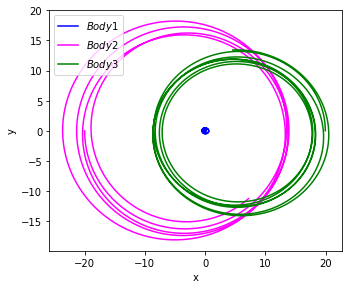

In [51]:
fig = plt.figure(figsize=(5,5), num='pendulum')
ax = fig.add_subplot(1,1,1)

ax.plot(x_pos1_ivp, y_pos1_ivp, linestyle='solid', color = 'blue',\
        label=rf'$Body 1$')

ax.plot(x_pos2_ivp, y_pos2_ivp, linestyle='solid', color = 'magenta',\
        label=rf'$Body 2$')

ax.plot(x_pos3_ivp, y_pos3_ivp, linestyle='solid', color = 'green',\
        label=rf'$Body 3$')

ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
ax.set_aspect(1)

fig.tight_layout();